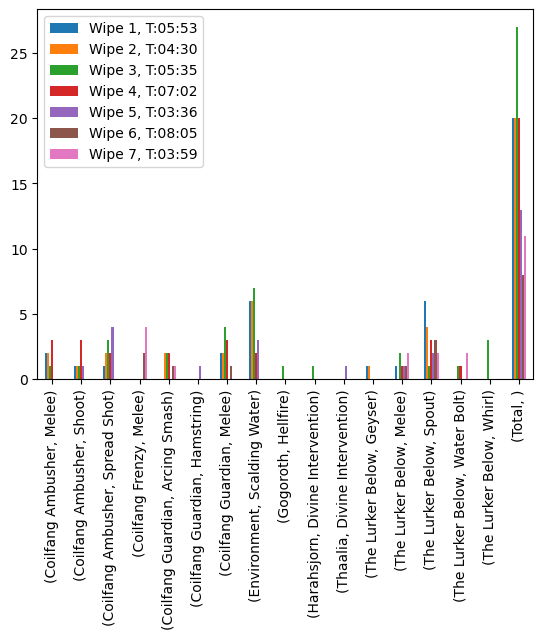

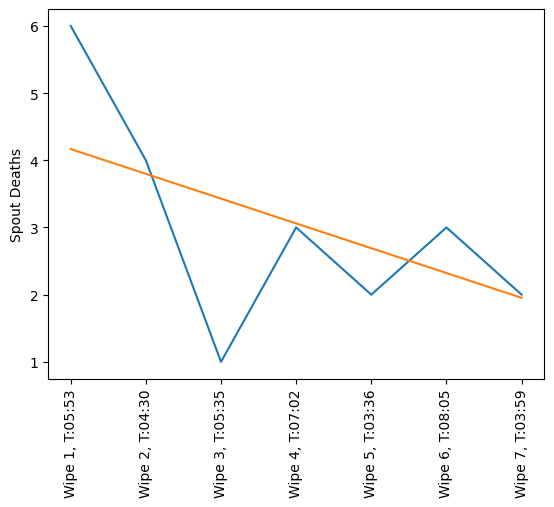

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# plt.switch_backend('QtAgg4')

pd.set_option("display.max_rows", None, "display.max_columns", None)



ssc_deaths = dict()
wipes = pd.DataFrame()
data_dir =  'ssc_data'
for (_, _, filenames) in os.walk('ssc_data'):
    for i,file in enumerate(filenames):
        data = pd.read_csv(os.path.join(data_dir, file))


        data = pd.concat([data, data['Event'].str.extract(r'(?P<player>[\s\S]+) dies(?: from (?P<killer>[\s\S]+)\'s  (?P<action>[\s\S]+))?', expand=True)], axis=1)
        # Remove the numbers from guardians, ambushers and frenzies
        data['killer'] = data['killer'].str.replace(r'[0-9]+[\s\S]*$', "", regex=True)
        data['killer'] = data['killer'].str.strip()

        # find when ixam dies, then it's a wipe
        ixamdex = data.index[data['player'] == 'Ixam'].tolist()[0]
        time2wipe = ":".join(data.loc[ixamdex]['Time'].split(':')[1:]).split('.')[0]
        data = data.drop(data.index[ixamdex+1:])

        # Count deaths grouped by killer
        killers = data.groupby(['killer','action'])['player'].count()
        killers['Total'] = killers.sum()

        # Concat data into wipes frame
        wipes = pd.concat((wipes, killers.rename(f'Wipe {i+1}, T:{time2wipe}')), axis=1)

# Clean up wipes hotwater and fishies are now environment
wipes = wipes.fillna(0)
# wipes.loc['Environment'] = wipes.loc["Environment"] + wipes.loc["Coilfang Frenzy"]
# wipes = wipes.drop(["Gogoroth", "Harahsjorn","Thaalia" ,"Coilfang Frenzy"])

wipes.plot(kind='bar')
plt.show()


wipes.loc['The Lurker Below', 'Spout'].plot(ylabel='Spout Deaths', rot=90)
# ax.set_xticks()
# ax.set_xticklabels([1,2,3,4,5,6,7])
plt.plot([0,6],[4.167,1.953])
plt.show()

